In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вводные данные

In [2]:
date_name = "Дата"
y_name = "Значение инфляции"
protected_columns = "" #"Долг!;Реальный M2 справочно"

max_lag_down = 18
max_lag_up = 18

In [3]:
protected_columns = protected_columns.split(';')
protected_columns

['']

In [4]:
df = pd.read_excel("Data.xlsx")
df_final = df.copy()
X_columns = df.columns.tolist()

columns_to_drop = protected_columns + [y_name, date_name]

#print(columns_to_drop)

for col in columns_to_drop:
    try:
        X_columns.remove(col)
    except:
        print(X_columns)
        print(col)

X_columns

['Дата', 'Значение инфляции', 'Значение М2', 'Динамика М2', 'Реальный M2 справочно', 'сдвиг М2 6 мес', 'Динамика USD', 'Динамика USD (сдвиг 6 мес)', 'Долг!', 'Ключевая ставка', 'Срвзвеш кред.ставка более 1 года физлица', 'Срвзвеш кред.ставка более 1 года организации']



['Значение М2',
 'Динамика М2',
 'Реальный M2 справочно',
 'сдвиг М2 6 мес',
 'Динамика USD',
 'Динамика USD (сдвиг 6 мес)',
 'Долг!',
 'Ключевая ставка',
 'Срвзвеш кред.ставка более 1 года физлица',
 'Срвзвеш кред.ставка более 1 года организации']

In [10]:
df.tail(20)

,Дата,Значение инфляции,Значение М2,Динамика М2,Реальный M2 справочно,сдвиг М2 6 мес,Динамика USD,Динамика USD (сдвиг 6 мес),Долг!,Ключевая ставка,Срвзвеш кред.ставка более 1 года физлица,Срвзвеш кред.ставка более 1 года организации
118,2020-05-01,0.032,52951.7,0.140318,0.108318,0.161997,0.125174,0.243807,0.093132,5.50,11.77,9.00
119,2020-06-01,0.034,53068.0,0.135501,0.101501,0.140812,0.073723,0.189139,0.084809,4.50,11.59,8.26
120,2020-07-01,0.036,54392.6,0.148750,0.112750,0.135342,0.116677,0.193345,0.085549,4.50,11.39,7.13
121,2020-08-01,0.037,54687.4,0.154937,0.117937,0.137793,0.157679,0.207634,0.093834,4.25,10.85,7.42
122,2020-09-01,0.040,55294.2,0.162031,0.122031,0.133764,0.109941,0.111061,0.092653,4.25,10.72,6.99
123,2020-10-01,0.044,56023.9,0.160713,0.116713,0.113414,0.218750,0.008400,0.102063,4.25,10.36,6.81
124,2020-11-01,0.049,55871.6,0.161997,0.112997,0.118119,0.243807,0.029290,0.107572,4.25,10.07,7.04
125,2020-12-01,0.049,56122.6,0.140812,0.091812,0.115439,0.189139,0.044160,0.121103,4.25,10.29,6.58
126,2021-01-01,0.052,58652.1,0.135342,0.083342,0.095441,0.193345,0.032368,0.122410,4.25,10.05,6.77
127,2021-02-01,0.057,57598.4,0.137793,0.080793,0.085802,0.207634,-0.003133,0.118517,4.25,10.63,6.98


  Дата  Значение инфляции  Значение М2
0  NaT                NaN          NaN
1  NaT                NaN          NaN
2  NaT                NaN          NaN
3  NaT                NaN          NaN
4  NaT                NaN          NaN


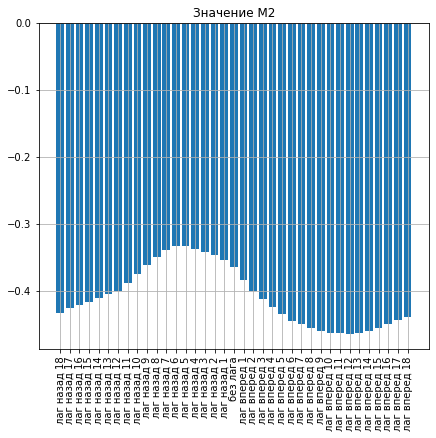

  Дата  Значение инфляции  Динамика М2
0  NaT                NaN          NaN
1  NaT                NaN          NaN
2  NaT                NaN          NaN
3  NaT                NaN          NaN
4  NaT                NaN          NaN


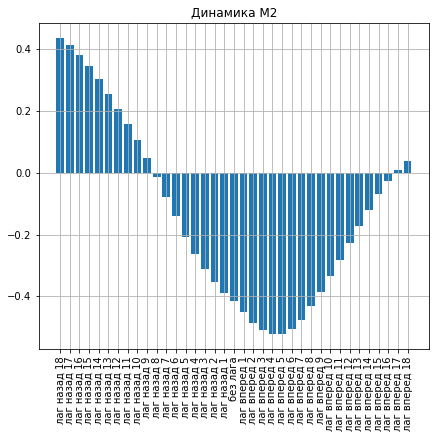

  Дата  Значение инфляции  Реальный M2 справочно
0  NaT                NaN                    NaN
1  NaT                NaN                    NaN
2  NaT                NaN                    NaN
3  NaT                NaN                    NaN
4  NaT                NaN                    NaN


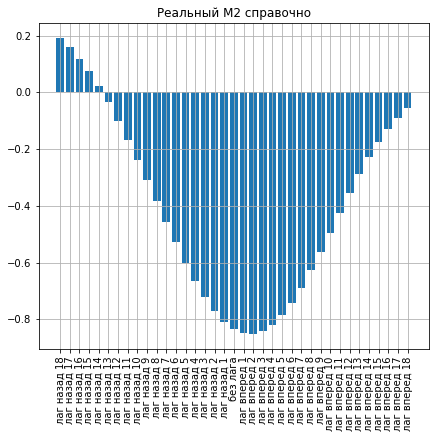

  Дата  Значение инфляции  сдвиг М2 6 мес
0  NaT                NaN             NaN
1  NaT                NaN             NaN
2  NaT                NaN             NaN
3  NaT                NaN             NaN
4  NaT                NaN             NaN


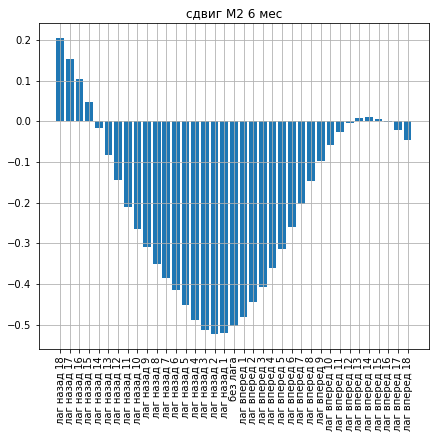

  Дата  Значение инфляции  Динамика USD
0  NaT                NaN           NaN
1  NaT                NaN           NaN
2  NaT                NaN           NaN
3  NaT                NaN           NaN
4  NaT                NaN           NaN


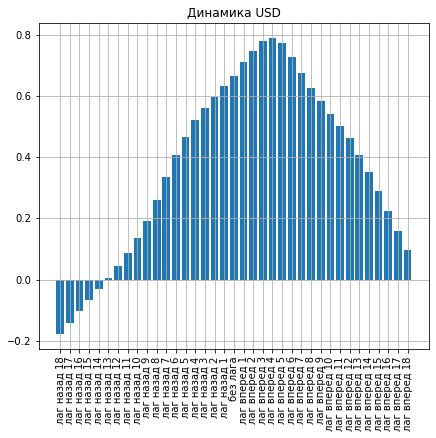

  Дата  Значение инфляции  Динамика USD (сдвиг 6 мес)
0  NaT                NaN                    0.005480
1  NaT                NaN                   -0.020683
2  NaT                NaN                   -0.034913
3  NaT                NaN                   -0.033205
4  NaT                NaN                   -0.056648


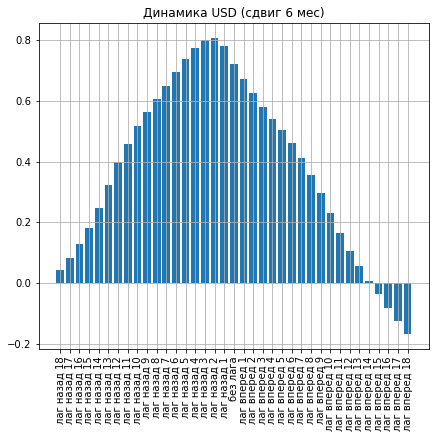

  Дата  Значение инфляции  Долг!
0  NaT                NaN    NaN
1  NaT                NaN    NaN
2  NaT                NaN    NaN
3  NaT                NaN    NaN
4  NaT                NaN    NaN


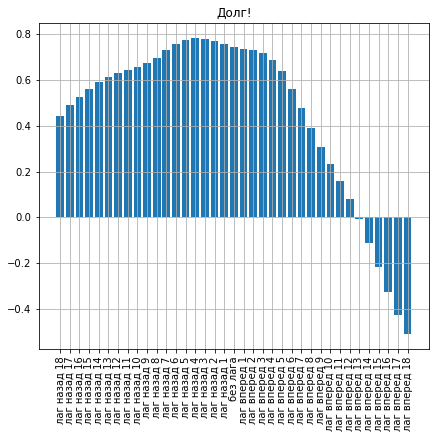

  Дата  Значение инфляции  Ключевая ставка
0  NaT                NaN              NaN
1  NaT                NaN              NaN
2  NaT                NaN              NaN
3  NaT                NaN              NaN
4  NaT                NaN              NaN


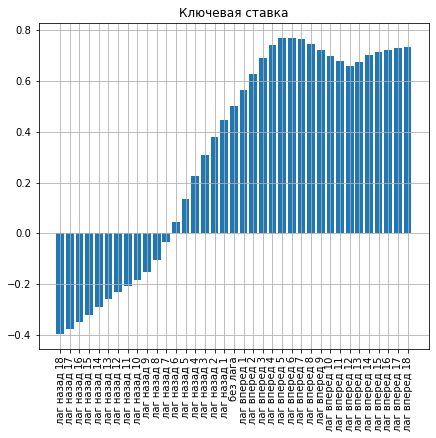

  Дата  Значение инфляции  Срвзвеш кред.ставка более 1 года физлица
0  NaT                NaN                                       NaN
1  NaT                NaN                                       NaN
2  NaT                NaN                                       NaN
3  NaT                NaN                                       NaN
4  NaT                NaN                                       NaN


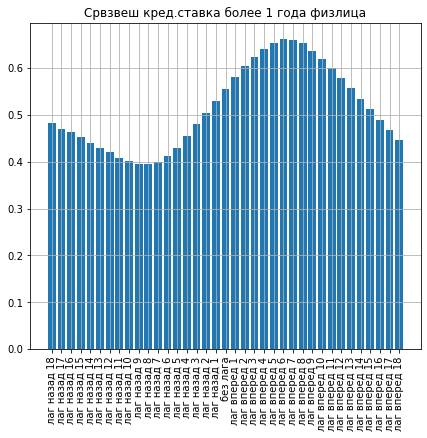

  Дата  Значение инфляции  Срвзвеш кред.ставка более 1 года организации
0  NaT                NaN                                           NaN
1  NaT                NaN                                           NaN
2  NaT                NaN                                           NaN
3  NaT                NaN                                           NaN
4  NaT                NaN                                           NaN


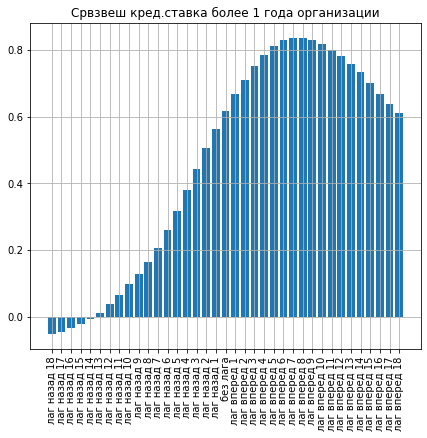

In [12]:
#добавить смещение вверх
#добавить знаки корреляции

for x in X_columns:
    df_x = df.loc[:, [date_name, y_name, x]]
    print(df_x.head())
    df_x = df_x.dropna()
    
    for i in range(1, max_lag_down+1):
        df_x[f"{x}_lag_down_{i}"] = df_x[x].shift(i)
        
    for i in range(1, max_lag_up+1):
        df_x[f"{x}_lag_up_{i}"] = df_x[x].shift(-i)
        
    df_x.to_excel(f'Excel_lags/{x}_lags.xlsx')
        
    #df_x = df_x.dropna()
    df_x_corr = df_x.corr()
    
    cor_series = df_x_corr.iloc[1:, 0]
    lags_names = ['без лага'] + [f"лаг назад {i}" for i in range(1, max_lag_down+1)] \
                + [f"лаг вперед {i}" for i in range(1, max_lag_up+1)]
    cor_series.index = lags_names
    cor_series = cor_series.loc[ [f"лаг назад {i}" for i in range(max_lag_down, 0, -1)] + ['без лага'] \
                                    +[f"лаг вперед {i}" for i in range(1, max_lag_up+1)]]
    
    plt.figure(figsize=(7, 6))
    plt.grid()
    plt.bar(cor_series.index, cor_series)
    plt.title(x)
    plt.xticks(rotation=90)
    plt.savefig(f'Pictures/{x}_lags_pic.png', bbox_inches = 'tight')
    plt.show()
    
    cor_series.to_excel(f'Excels/{x}_lags.xlsx')

In [14]:
df_final.to_excel("result.xlsx")